In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("data/train.csv") # training data
# df_result = pd.read_csv("data/test.csv") # test data for kaggle submission (not needed for this notebook)
df_train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

In [3]:
df_train.info() # get features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Analysis

In [4]:
# select numeric features for initial correlation matrix analysis
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', \
    'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', \
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'GarageArea', 'SalePrice']
df = df_train[features]
df.head(3)

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  BsmtFinSF2  \
0     8450            7            5       2003         706           0   
1     9600            6            8       1976         978           0   
2    11250            7            5       2001         486           0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   

   BsmtHalfBath  FullBath  HalfBath  GarageArea  SalePrice  
0             0         2         1         548     208500  
1             1         2         0         460     181500  
2             0         2         1         608     223500

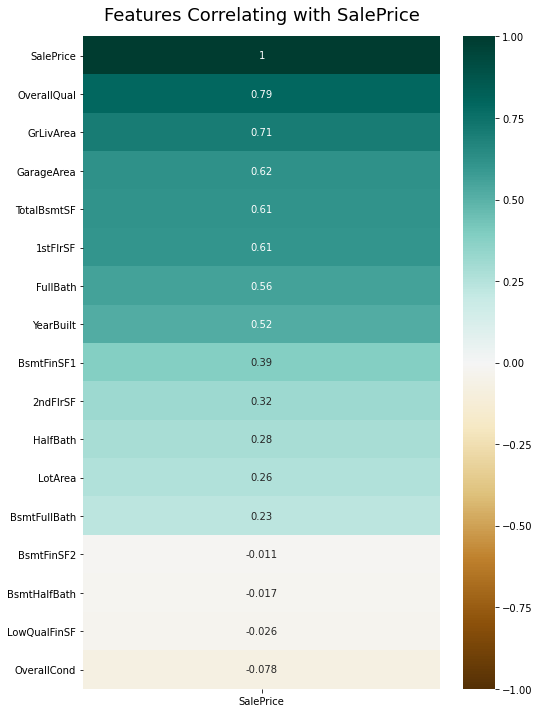

In [5]:
# get sorted correlations for the SalesPrice
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with SalePrice', fontdict={'fontsize':18}, pad=16);

## RESTULT ##
# 1. Overall Quality correlating strongly with the price - the better the qual, the higher the price
# 2. ground living area square feet also strongly correlating with price

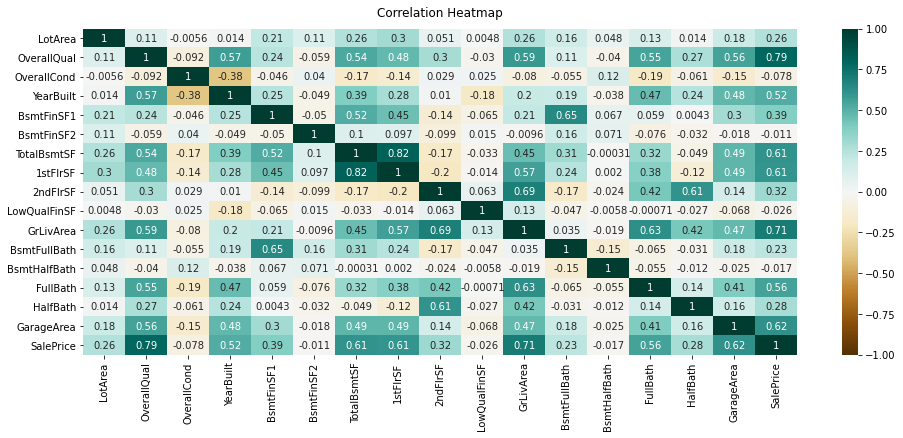

In [6]:
# get full correlation matrix to see further correlations between the features
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Linear Regression

In [7]:
# only use features where corr > 0.3
features_adj = ['OverallQual', 'YearBuilt', \
    'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', \
    'GrLivArea', 'FullBath', 'GarageArea', 'SalePrice']

df = df[features_adj]

In [8]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [9]:
### Data preparation (split into training and test data)
from sklearn.model_selection import train_test_split
X_data = df.drop('SalePrice', axis=1).values # independent variables
y_data = df['SalePrice'].values # dependent variable (Price)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=0)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 292
number of training samples: 1168


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train, y_train) # train model with training data

Yhat = lm.predict(X_test) # predict values with test data

print("R^2:", lm.score(X_test, y_test)) # calculate & print R^2
print("MSE:", mean_squared_error(y_test, Yhat))
print("Slopes:", lm.coef_) # calculate & print slope
print("Intercept:", lm.intercept_) # calculate & print intercept

R^2: 0.6152097201673783
MSE: 2657303940.1310325
Slopes: [19783.67761097   304.88591768    25.02958757    21.23110808
    38.82690395    31.00093553    25.51085145 -2888.52074738
    43.4458457 ]
Intercept: -684650.4640801884


## DecisionTreeRegressor

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) # train decision tree

Yhat = dt.predict(X_test)

print("R^2:", dt.score(X_test, y_test)) # calculate & print R^2

R^2: 0.7779777808452917


## Neural Network

In [12]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)
Yhat = nn.predict(X_test)

print("R^2:", nn.score(X_test, y_test)) # calculate & print R^2

R^2: 0.5031493190862255


## Result

<p>Decision Tree has the best prediction based on the chosen features</p>